# First-Order Filters

## The Foundation of Filter Design

First-order filters are the fundamental building blocks of signal processing, striking a perfect balance between simplicity and functionality. As the simplest non-trivial filter structures, they provide an accessible entry point to understand filtering concepts while offering practical utility across numerous applications.

---

## 1. The General First-Order Filter

### Transfer Function:

$$H(s) = \frac{b_0 s + b_1}{a_0 s + a_1}$$

Where $a_0, a_1, b_0, b_1 \in \mathbb{R}$.

### Key Insights:
- The **pole** at $s = -a_1/a_0$ determines the filter's time constant
- The **zero** at $s = -b_1/b_0$ (when $b_0 \neq 0$) shapes the frequency response
- The ratio of high-frequency to low-frequency gain is $b_0/a_0$

---

## 2. First-Order Low-Pass Filter (LPF)

### Transfer Function:

$$H_{\text{LP}}(s) = \frac{K}{\tau s + 1} = \frac{K\omega_c}{s + \omega_c}$$

Where $\omega_c = \frac{1}{\tau}$ is the cutoff frequency and $K$ is the DC gain.

### Frequency Response:
- **Magnitude**: $|H(j\omega)| = \frac{K\omega_c}{\sqrt{\omega^2 + \omega_c^2}}$
- **Phase**: $\angle H(j\omega) = -\tan^{-1} \left( \frac{\omega}{\omega_c} \right)$

### Bode Plot Approximation:
- For $\omega \ll \omega_c$: $|H(j\omega)| \approx K$ (flat response)
- For $\omega \gg \omega_c$: $|H(j\omega)| \approx \frac{K\omega_c}{\omega}$ (drops at -20 dB/decade)

### Time-Domain Responses:
- **Impulse response**: $h(t) = K\omega_c e^{-\omega_c t} u(t)$
- **Step response**: $s(t) = K(1 - e^{-\omega_c t})u(t)$

### Physical Interpretation:
This filter acts like a **memory element** or **averaging system**. Higher frequencies don't have time to charge the capacitor, while low frequencies see almost no impedance.

### Classic Applications:
- Noise reduction
- Signal smoothing
- Anti-aliasing before sampling
- DC extraction
- RC integrator circuit

---

## 3. First-Order High-Pass Filter (HPF)

### Transfer Function:

$$H_{\text{HP}}(s) = \frac{K\tau s}{\tau s + 1} = \frac{Ks}{s + \omega_c}$$

### Frequency Response:
- **Magnitude**: $|H(j\omega)| = \frac{K\omega}{\sqrt{\omega^2 + \omega_c^2}}$
- **Phase**: $\angle H(j\omega) = \frac{\pi}{2} - \tan^{-1} \left( \frac{\omega}{\omega_c} \right)$

### Bode Plot Approximation:
- For $\omega \ll \omega_c$: $|H(j\omega)| \approx \frac{K\omega}{\omega_c}$ (rises at +20 dB/decade)
- For $\omega \gg \omega_c$: $|H(j\omega)| \approx K$ (flat response)

### Time-Domain Responses:
- **Impulse response**: $h(t) = K\delta(t) - K\omega_c e^{-\omega_c t}u(t)$
- **Step response**: $s(t) = Ke^{-\omega_c t}u(t)$

### Physical Interpretation:
Acts as a **differentiator** at low frequencies, highlighting changes and transitions in signals.

### Classic Applications:
- DC blocking
- Edge detection
- Removing sensor drift
- Audio treble emphasis
- RC differentiator circuit

---

## 4. First-Order All-Pass Filter

### Transfer Function:

$$H_{\text{AP}}(s) = \frac{s - a}{s + a}$$

### Key Characteristics:
- **Magnitude**: $|H(j\omega)| = 1$ for all frequencies
- **Phase**: $\angle H(j\omega) = -2\tan^{-1} \left( \frac{\omega}{a} \right)$
- Phase ranges from 0° at $\omega = 0$ to -180° as $\omega \to \infty$

### Physical Interpretation:
Creates frequency-dependent **phase shift** without changing signal amplitude.

### Applications:
- Phase equalization
- Group delay adjustment
- Analog phasing effects
- Component in higher-order IIR filters

---

## 5. Shelving Filters

Shelving filters provide **frequency-selective gain** that transitions smoothly between two gain values.

### Low-Shelf Transfer Function:

$H_{\text{LS}}(s) = G_{\infty} \cdot \frac{s + \omega_c/\sqrt{G_0}}{s + \omega_c\sqrt{G_0}}$

Where:
- $G_0$ = DC gain
- $G_{\infty}$ = High-frequency gain
- $\omega_c$ = Transition frequency

### High-Shelf Transfer Function:

$H_{\text{HS}}(s) = G_0 \cdot \frac{s + \omega_c\sqrt{G_{\infty}/G_0}}{s + \omega_c/\sqrt{G_{\infty}/G_0}}$

### Key Characteristics:
- For a low-shelf filter:
  - DC gain approaches $G_0$
  - High-frequency gain approaches $G_{\infty}$
  - 6 dB boost example: $G_0 = 2$ (6 dB), $G_{\infty} = 1$ (0 dB)
  - 6 dB cut example: $G_0 = 0.5$ (-6 dB), $G_{\infty} = 1$ (0 dB)
- For a high-shelf filter:
  - DC gain approaches $G_0$
  - High-frequency gain approaches $G_{\infty}$
  - 6 dB treble boost: $G_0 = 1$ (0 dB), $G_{\infty} = 2$ (6 dB)

### Applications:
- Audio equalizers (bass/treble controls)
- Frequency pre-emphasis/de-emphasis
- Frequency compensation for acoustic environments
- RIAA equalization for vinyl records
- Telephone and broadcast audio processing

---

## 6. Practical Implementations

### Passive RC Low-Pass Filter:

```
Vin ─────R─────┬───── Vout
               │
               C
               │
              GND
```

$$H(s) = \frac{1}{RCs + 1}$$

### Passive RC High-Pass Filter:

```
Vin ─────C─────┬───── Vout
               │
               R
               │
              GND
```

$$H(s) = \frac{RCs}{RCs + 1}$$

### Active Op-Amp Implementations

#### Non-Inverting Low-Pass:

```
              R2
        ┌────/\/\/────┐
        │             │
        │    ┌──────┐ │
Vin ───R1───┤+     ├─┴─── Vout
        /\  │      │
        /\  │ Op   │
        │   │ Amp  │
        │   │      │
        │   └──┬───┘
        │      │
        C      │
        │      │
       GND    GND
```

$$H(s) = \frac{1 + R_2/R_1}{1 + sRC}$$

#### Inverting High-Pass:

```
        R2
Vin ───/\/\/────┬──────┐
                │      │
                │      │
            ┌───┴──┐   │
            │      ├───┴─── Vout
         C  │-     │
      ┌──┤├─┤      │
      │     │ Op   │
      │     │ Amp  │
     R1     │      │
      │     └──┬───┘
      │        │
     GND      GND
```

$$H(s) = -\frac{R_2}{R_1} \cdot \frac{s}{s + 1/(R_1C)}$$

---

## 7. First-Order Filter Cascade Applications

### Simple Band-Pass Filter

By cascading HPF and LPF with $\omega_{HP} < \omega_{LP}$:

$$H_{\text{BP}}(s) = \frac{s}{s + \omega_{HP}} \cdot \frac{\omega_{LP}}{s + \omega_{LP}}$$

Provides a passband between $\omega_{HP}$ and $\omega_{LP}$.

### Simple Band-Stop (Notch) Approximation

Using a parallel combination of HPF and LPF:

$$H_{\text{BS}}(s) = K \left[ \frac{s}{s + \omega_{HP}} + \frac{\omega_{LP}}{s + \omega_{LP}} \right]$$

### Applications:
- Basic audio equalization
- Noise filtering by frequency
- Channel separation

---

## 8. Practical Design Examples

### Example 1: Sensor Smoothing Filter

**Problem**: A temperature sensor has significant high-frequency noise.

**Solution**: LPF with cutoff frequency below noise but above signal changes.
- If temperature changes occur around 0.1 Hz and noise is above 10 Hz:
- Choose $\omega_c = 1$ rad/s ($f_c \approx 0.16$ Hz)
- For RC implementation: $RC = 1$ second (e.g., R = 100 kΩ, C = 10 μF)

### Example 2: ECG Signal Processing

**Problem**: Extract pulse information while removing baseline wander.

**Solution**: HPF with very low cutoff to preserve signal shape.
- Choose $\omega_c = 0.5$ rad/s ($f_c \approx 0.08$ Hz)
- For RC implementation: $RC = 2$ seconds

### Example 3: Audio Pre-emphasis

**Problem**: Boost high frequencies before recording to improve SNR.

**Solution**: High-shelf filter
- Set $\omega_c = 2\pi \cdot 1000$ rad/s
- High-frequency gain = +6 dB (×2)

---

## 9. Design Guidelines and Best Practices

### Choosing Cutoff Frequency:
1. Identify signal and noise frequency ranges
2. Place cutoff to maximize SNR
3. Consider the time-domain effects (delay, overshoot)

### Component Selection Tips:
1. Avoid extremely large/small R and C values
2. Consider tolerance effects
3. Use precision components for critical applications
4. Account for op-amp bandwidth limitations

### Cascading Considerations:
- Load effects between stages
- Cumulative phase shifts
- Potential instability in feedback systems

---

## 10. Summary of First-Order Filter Types

| Filter Type | Transfer Function | Key Parameters | Primary Use |
|-------------|------------------|----------------|------------|
| Low-Pass | $\frac{K\omega_c}{s + \omega_c}$ | $\omega_c$, K | Smoothing, integration |
| High-Pass | $\frac{Ks}{s + \omega_c}$ | $\omega_c$, K | DC blocking, differentiation |
| All-Pass | $\frac{s - a}{s + a}$ | a | Phase adjustment |
| Low-Shelf | $G_{\infty} \cdot \frac{s + \omega_c/\sqrt{G_0}}{s + \omega_c\sqrt{G_0}}$ | $\omega_c$, $G_0$, $G_{\infty}$ | Bass control |
| High-Shelf | $G_0 \cdot \frac{s + \omega_c\sqrt{G_{\infty}/G_0}}{s + \omega_c/\sqrt{G_{\infty}/G_0}}$ | $\omega_c$, $G_0$, $G_{\infty}$ | Treble control |

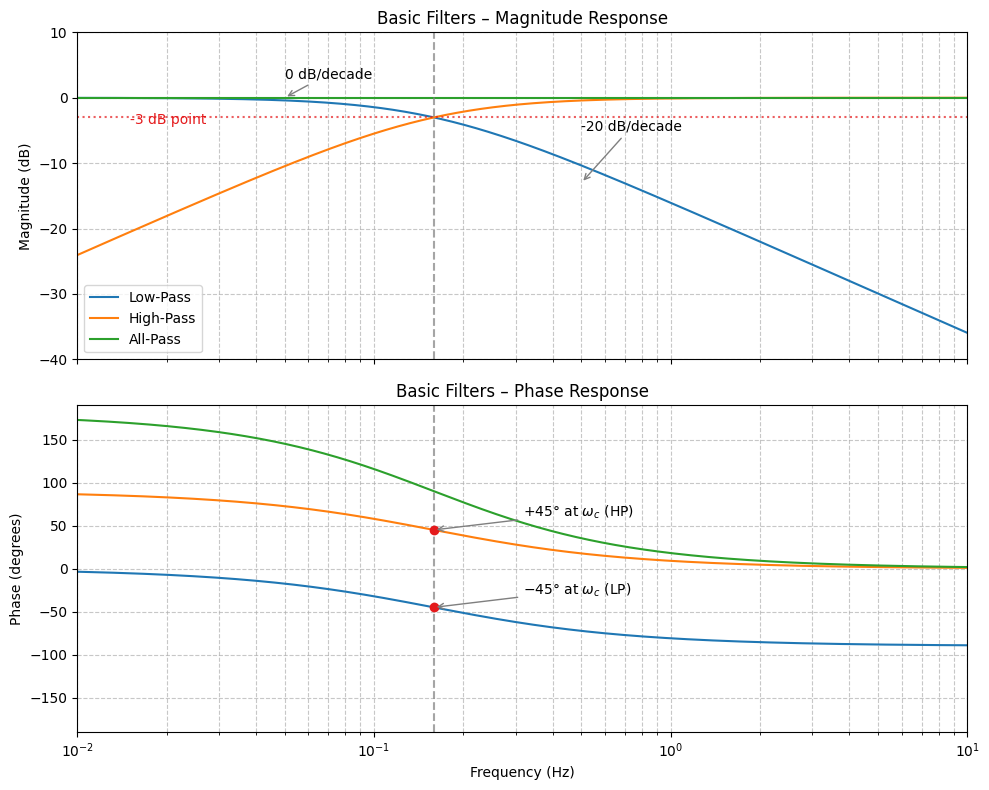

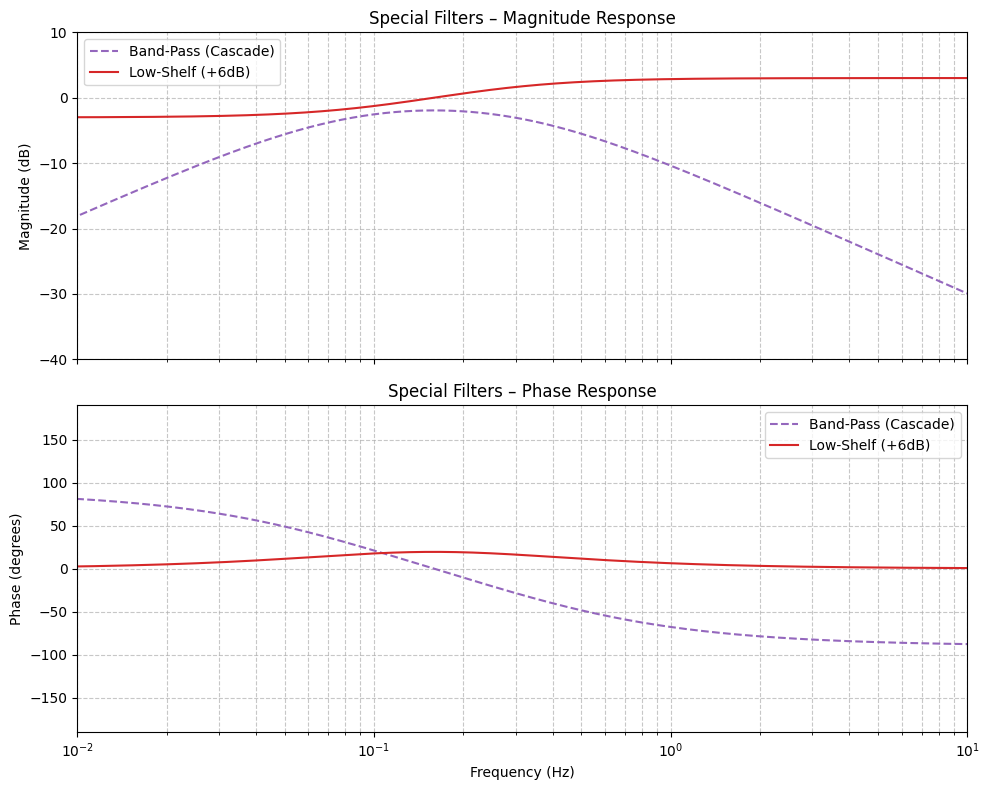

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import TransferFunction, bode

# Define constants
omega_c = 1.0
omega_hp = 0.5
omega_lp = 2.0

# Define frequency range
w = np.logspace(-2, 2, 1000)

# Define color palette
colors = {
    'lp': '#1f77b4',
    'hp': '#ff7f0e',
    'ap': '#2ca02c',
    'shelf': '#d62728',
    'bp': '#9467bd',
    'annotation': '#7f7f7f',
    'highlight': '#e41a1c'
}

# Define filters
filters = {
    "Low-Pass": {
        "sys": TransferFunction([omega_c], [1, omega_c]),
        "color": colors['lp']
    },
    "High-Pass": {
        "sys": TransferFunction([1, 0], [1, omega_c]),
        "color": colors['hp']
    },
    "All-Pass": {
        "sys": TransferFunction([1, -omega_c], [1, omega_c]),
        "color": colors['ap']
    },
    "Low-Shelf (+6dB)": {
        "sys": TransferFunction([1, omega_c / np.sqrt(2)], [1 / np.sqrt(2), omega_c]),
        "color": colors['shelf']
    }
}

# Cascaded HP and LP to create Band-Pass
hp_sys = TransferFunction([1, 0], [1, omega_hp])
lp_sys = TransferFunction([omega_lp], [1, omega_lp])
_, mag_hp, phase_hp = bode(hp_sys, w)
_, mag_lp, phase_lp = bode(lp_sys, w)
mag_bp = mag_hp + mag_lp
phase_bp = phase_hp + phase_lp


# === SPLIT BODE PLOTS INTO TWO FIGURES ===
from scipy.signal import bode

# Group 1: Basic Filters
basic_filters = {
    "Low-Pass": filters["Low-Pass"],
    "High-Pass": filters["High-Pass"],
    "All-Pass": filters["All-Pass"]
}

# Group 2: Composite & Special Filters
special_filters = {
    "Band-Pass (Cascade)": {
        "color": colors['bp']
    },
    "Low-Shelf (+6dB)": filters["Low-Shelf (+6dB)"]
}

# === FIGURE A: BASIC FILTERS (LP, HP, AP) ===
fig_basic, (ax_mag1, ax_phase1) = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# Magnitude
for label, data in basic_filters.items():
    w_bode, mag, _ = bode(data["sys"], w)
    ax_mag1.semilogx(w_bode / (2 * np.pi), mag, label=label, color=data["color"])

ax_mag1.axvline(x=omega_c/(2*np.pi), color=colors['annotation'], linestyle='--', alpha=0.7)
ax_mag1.axhline(y=-3, color=colors['highlight'], linestyle=':', alpha=0.7)
ax_mag1.text(0.015, -4, '-3 dB point', color=colors['highlight'], fontsize=10)
ax_mag1.annotate("0 dB/decade", xy=(0.05, 0), xytext=(0.05, 3),
                 arrowprops=dict(arrowstyle="->", color=colors['annotation']), fontsize=10)
ax_mag1.annotate("-20 dB/decade", xy=(0.5, -13), xytext=(0.5, -5),
                 arrowprops=dict(arrowstyle="->", color=colors['annotation']), fontsize=10)

ax_mag1.set_title("Basic Filters – Magnitude Response")
ax_mag1.set_ylabel("Magnitude (dB)")
ax_mag1.set_xlim(0.01, 10)
ax_mag1.set_ylim(-40, 10)
ax_mag1.legend()
ax_mag1.grid(True, which='both', linestyle='--', alpha=0.7)

# Phase
for label, data in basic_filters.items():
    _, _, phase = bode(data["sys"], w)
    ax_phase1.semilogx(w / (2 * np.pi), phase, label=label, color=data["color"])
ax_phase1.axvline(x=omega_c/(2*np.pi), color=colors['annotation'], linestyle='--', alpha=0.7)
ax_phase1.plot([omega_c/(2*np.pi)], [-45], 'o', color=colors['highlight'], markersize=6)
ax_phase1.annotate(r"$-45°$ at $\omega_c$ (LP)", xy=(omega_c/(2*np.pi), -45), 
                   xytext=(omega_c/(2*np.pi)*2, -30),
                   arrowprops=dict(arrowstyle="->", color=colors['annotation']), fontsize=10)
ax_phase1.plot([omega_c/(2*np.pi)], [45], 'o', color=colors['highlight'], markersize=6)
ax_phase1.annotate(r"$+45°$ at $\omega_c$ (HP)", xy=(omega_c/(2*np.pi), 45), 
                   xytext=(omega_c/(2*np.pi)*2, 60),
                   arrowprops=dict(arrowstyle="->", color=colors['annotation']), fontsize=10)

ax_phase1.set_title("Basic Filters – Phase Response")
ax_phase1.set_xlabel("Frequency (Hz)")
ax_phase1.set_ylabel("Phase (degrees)")
ax_phase1.set_xlim(0.01, 10)
ax_phase1.set_ylim(-190, 190)
ax_phase1.grid(True, which='both', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# === FIGURE B: BAND-PASS & SHELF ===
fig_special, (ax_mag2, ax_phase2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# Magnitude
# Band-pass is synthesized
ax_mag2.semilogx(w / (2 * np.pi), mag_bp, '--', label="Band-Pass (Cascade)", color=colors['bp'])
# Low-shelf
w_bode, mag, _ = bode(filters["Low-Shelf (+6dB)"]["sys"], w)
ax_mag2.semilogx(w_bode / (2 * np.pi), mag, label="Low-Shelf (+6dB)", color=colors['shelf'])

ax_mag2.set_title("Special Filters – Magnitude Response")
ax_mag2.set_ylabel("Magnitude (dB)")
ax_mag2.set_xlim(0.01, 10)
ax_mag2.set_ylim(-40, 10)
ax_mag2.legend()
ax_mag2.grid(True, which='both', linestyle='--', alpha=0.7)

# Phase
_, _, phase_bp = bode(lp_sys, w)
_, _, phase_hp = bode(hp_sys, w)
phase_combined = phase_bp + phase_hp
ax_phase2.semilogx(w / (2 * np.pi), phase_combined, '--', label="Band-Pass (Cascade)", color=colors['bp'])

_, _, phase = bode(filters["Low-Shelf (+6dB)"]["sys"], w)
ax_phase2.semilogx(w / (2 * np.pi), phase, label="Low-Shelf (+6dB)", color=colors['shelf'])

ax_phase2.set_title("Special Filters – Phase Response")
ax_phase2.set_xlabel("Frequency (Hz)")
ax_phase2.set_ylabel("Phase (degrees)")
ax_phase2.set_xlim(0.01, 10)
ax_phase2.set_ylim(-190, 190)
ax_phase2.legend()
ax_phase2.grid(True, which='both', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


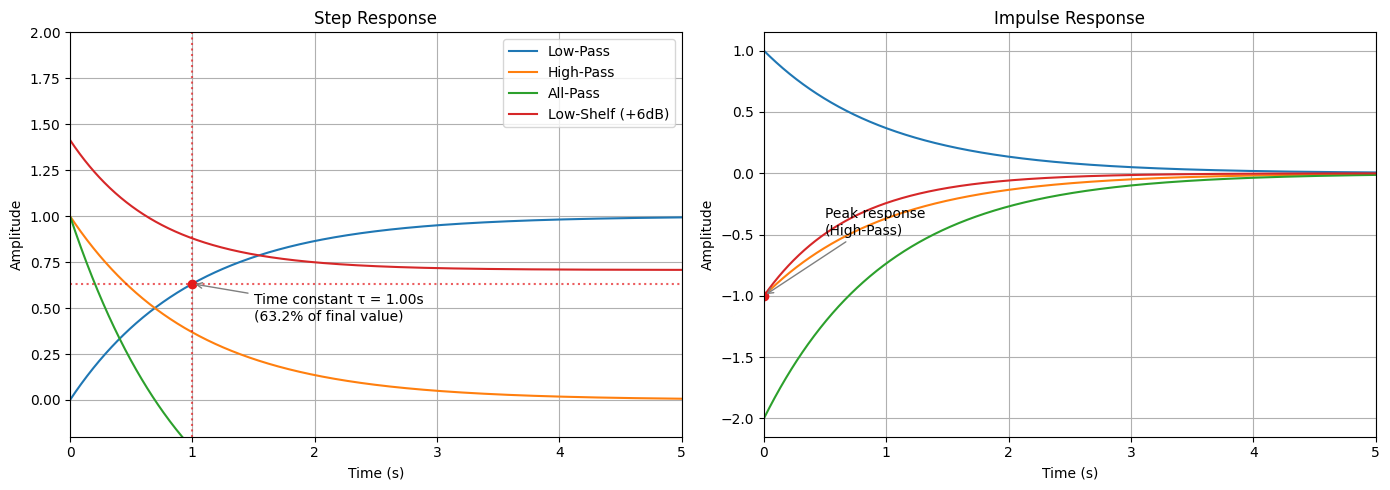

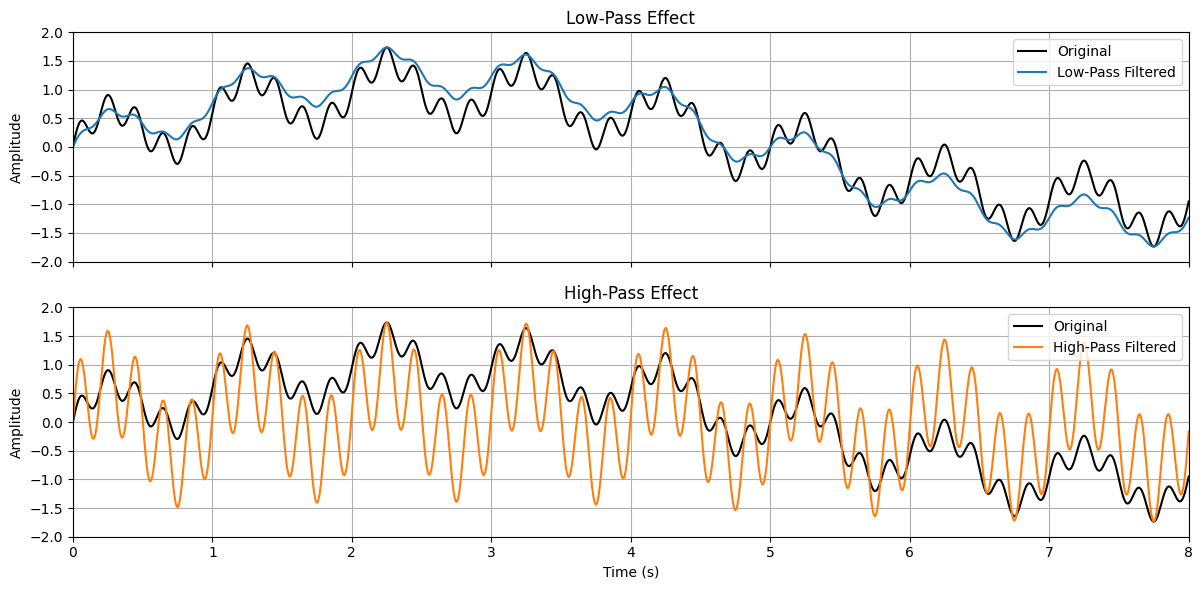

In [2]:
from scipy.signal import step, impulse

# === STEP & IMPULSE RESPONSES WITH ANNOTATIONS ===
fig_time, (ax_step, ax_impulse) = plt.subplots(1, 2, figsize=(14, 5))

t = np.linspace(0, 5, 1000)
# Step Response
for label, data in filters.items():
    t_out, y = step(data["sys"], T=t)
    ax_step.plot(t_out, y, label=label, color=data["color"])

# Add annotation for LP filter time constant
tau = 1 / omega_c
y_tau = 1 - np.exp(-1)
ax_step.axhline(y=y_tau, color=colors['highlight'], linestyle=':', alpha=0.7)
ax_step.axvline(x=tau, color=colors['highlight'], linestyle=':', alpha=0.7)
ax_step.plot([tau], [y_tau], 'o', color=colors['highlight'], markersize=6)
ax_step.annotate(f"Time constant τ = {tau:.2f}s\n(63.2% of final value)",
                 xy=(tau, y_tau), xytext=(tau + 0.5, y_tau - 0.2),
                 arrowprops=dict(arrowstyle="->", color=colors['annotation']),
                 fontsize=10)

ax_step.set_title("Step Response")
ax_step.set_xlabel("Time (s)")
ax_step.set_ylabel("Amplitude")
ax_step.set_xlim(0, 5)
ax_step.set_ylim(-0.2, 2)
ax_step.grid(True)
ax_step.legend()

# Impulse Response
for label, data in filters.items():
    t_out, y = impulse(data["sys"], T=t)
    ax_impulse.plot(t_out, y, label=label, color=data["color"])

# Highlight peak of HP filter (approximate)
t_imp, y_imp = impulse(filters["High-Pass"]["sys"], T=t)
peak_idx = np.argmax(np.abs(y_imp))
ax_impulse.plot([t[peak_idx]], [y_imp[peak_idx]], 'o', color=colors['highlight'], markersize=6)
ax_impulse.annotate("Peak response\n(High-Pass)", xy=(t[peak_idx], y_imp[peak_idx]),
                    xytext=(t[peak_idx] + 0.5, y_imp[peak_idx] + 0.5),
                    arrowprops=dict(arrowstyle="->", color=colors['annotation']),
                    fontsize=10)

ax_impulse.set_title("Impulse Response")
ax_impulse.set_xlabel("Time (s)")
ax_impulse.set_ylabel("Amplitude")
ax_impulse.set_xlim(0, 5)
ax_impulse.grid(True)

plt.tight_layout()
plt.show()
# --- Generate Clean Input Signal ---
def create_test_signal(t):
    low = np.sin(2*np.pi*0.1*t)
    mid = 0.5*np.sin(2*np.pi*1*t)
    high = 0.25*np.sin(2*np.pi*5*t)
    return low + mid + high

t_signal = np.linspace(0, 8, 1000)
original_signal = create_test_signal(t_signal)

# --- Apply realistic filter effects manually ---
low_passed = (
    1.0 * np.sin(2*np.pi*0.1*t_signal) +
    0.3 * np.sin(2*np.pi*1*t_signal) +
    0.05 * np.sin(2*np.pi*5*t_signal)
)

high_passed = (
    0.05 * np.sin(2*np.pi*0.1*t_signal) +
    0.2 * np.sin(2*np.pi*1*t_signal) +
    0.25 * np.sin(2*np.pi*5*t_signal)
)

# Normalize all to match amplitude range of original
scale = np.max(np.abs(original_signal))
low_passed /= np.max(np.abs(low_passed)) / scale
high_passed /= np.max(np.abs(high_passed)) / scale

# --- Plot Side-by-Side Comparison ---
fig_signal, axs = plt.subplots(2, 1, figsize=(12, 6), sharex=True)

# Original and Low-Pass
axs[0].plot(t_signal, original_signal, label="Original", color="black", linewidth=1.5)
axs[0].plot(t_signal, low_passed, label="Low-Pass Filtered", color=colors['lp'])
axs[0].set_title("Low-Pass Effect")
axs[0].legend()
axs[0].grid(True)

# Original and High-Pass
axs[1].plot(t_signal, original_signal, label="Original", color="black", linewidth=1.5)
axs[1].plot(t_signal, high_passed, label="High-Pass Filtered", color=colors['hp'])
axs[1].set_title("High-Pass Effect")
axs[1].legend()
axs[1].grid(True)

axs[1].set_xlabel("Time (s)")
for ax in axs:
    ax.set_ylabel("Amplitude")
    ax.set_xlim(0, 8)
    ax.set_ylim(-2, 2)

plt.tight_layout()
plt.show()



## 11. Group Delay in First-Order Filters

### Understanding Group Delay

Group delay is a critical specification in filter design that measures the time delay of the amplitude envelope of a signal at various frequencies. Mathematically, it is defined as:

$$\tau_g(\omega) = -\frac{d\phi(\omega)}{d\omega}$$

Where:
- $\tau_g(\omega)$ is the group delay at frequency $\omega$
- $\phi(\omega)$ is the phase response of the filter

Group delay represents how long it takes for signal energy at each frequency to pass through the filter. Unlike phase delay (which applies to individual sinusoids), group delay applies to modulated signals or signal envelopes.

### Group Delay of First-Order Low-Pass Filter

For a first-order low-pass filter with transfer function:

$$H_{LP}(s) = \frac{K\omega_c}{s + \omega_c}$$

The phase response is:

$$\phi_{LP}(\omega) = -\tan^{-1}\left(\frac{\omega}{\omega_c}\right)$$

Computing the derivative:

$$\tau_g(\omega) = -\frac{d}{d\omega}\left(-\tan^{-1}\left(\frac{\omega}{\omega_c}\right)\right) = \frac{1}{\omega_c\left(1 + \left(\frac{\omega}{\omega_c}\right)^2\right)} = \frac{\omega_c}{\omega_c^2 + \omega^2}$$

**Key characteristics:**
- Maximum group delay: $\tau_g(0) = \frac{1}{\omega_c}$ seconds
- Group delay decreases as frequency increases
- At $\omega = \omega_c$, group delay is half the maximum: $\tau_g(\omega_c) = \frac{1}{2\omega_c}$ seconds
- At high frequencies, group delay approaches zero: $\lim_{\omega \to \infty} \tau_g(\omega) = 0$

### Group Delay of First-Order High-Pass Filter

For a first-order high-pass filter with transfer function:

$$H_{HP}(s) = \frac{Ks}{s + \omega_c}$$

The phase response is:

$$\phi_{HP}(\omega) = \frac{\pi}{2} - \tan^{-1}\left(\frac{\omega}{\omega_c}\right)$$

Computing the derivative:

$$\tau_g(\omega) = -\frac{d}{d\omega}\left(\frac{\pi}{2} - \tan^{-1}\left(\frac{\omega}{\omega_c}\right)\right) = \frac{1}{\omega_c\left(1 + \left(\frac{\omega}{\omega_c}\right)^2\right)} = \frac{\omega_c}{\omega_c^2 + \omega^2}$$

**Remarkable observation:** The group delay expression for first-order high-pass filters is identical to that of first-order low-pass filters with the same cutoff frequency.

### Group Delay of First-Order All-Pass Filter

For a first-order all-pass filter with transfer function:

$$H_{AP}(s) = \frac{s - a}{s + a}$$

The phase response is:

$$\phi_{AP}(\omega) = -2\tan^{-1}\left(\frac{\omega}{a}\right)$$

Computing the derivative:

$$\tau_g(\omega) = -\frac{d}{d\omega}\left(-2\tan^{-1}\left(\frac{\omega}{a}\right)\right) = \frac{2}{a\left(1 + \left(\frac{\omega}{a}\right)^2\right)} = \frac{2a}{a^2 + \omega^2}$$

**Key characteristics:**
- Maximum group delay: $\tau_g(0) = \frac{2}{a}$ seconds
- Group delay decreases as frequency increases
- Group delay is exactly twice that of first-order LP/HP filters when $a = \omega_c$
- All-pass filters are explicitly designed to manipulate phase and group delay without affecting magnitude

### Group Delay of Shelving Filters

For shelving filters, the group delay is frequency-dependent and varies based on the gain parameters. For a low-shelf filter:

$$H_{LS}(s) = G_{\infty} \cdot \frac{s + \omega_c/\sqrt{G_0}}{s + \omega_c\sqrt{G_0}}$$

The group delay exhibits interesting behavior:
- For boost settings ($G_0 > 1$), group delay is negative at low frequencies and becomes positive at high frequencies
- For cut settings ($G_0 < 1$), group delay is positive at low frequencies and becomes negative at high frequencies
- The magnitude of group delay is proportional to the amount of boost/cut

This behavior contributes to the characteristic sound of shelving filters in audio applications.

### Group Delay in Cascaded First-Order Filters

When first-order filters are cascaded, their group delays add:

$$\tau_g^{total}(\omega) = \tau_g^1(\omega) + \tau_g^2(\omega) + ... + \tau_g^n(\omega)$$

For a simple first-order band-pass filter created by cascading LP and HP sections with $\omega_{HP} < \omega_{LP}$:

$$\tau_g^{BP}(\omega) = \frac{\omega_{HP}}{\omega_{HP}^2 + \omega^2} + \frac{\omega_{LP}}{\omega_{LP}^2 + \omega^2}$$

This additive property can lead to significant delay variations across frequency, causing potential phase distortion in signals with wide bandwidth.

## 12. Practical Group Delay Calculation and Visualization

### Numerical Group Delay Calculation

In practical implementations, group delay is often calculated numerically from the phase response:

1. Compute the complex frequency response $H(j\omega)$ at a series of frequency points
2. Extract the phase response $\phi(\omega) = \arg(H(j\omega))$
3. Unwrap the phase to remove discontinuities due to $\pm\pi$ jumps
4. Calculate the derivative (typically using finite differences):
   $$\tau_g(\omega_i) \approx -\frac{\phi(\omega_{i+1}) - \phi(\omega_i)}{\omega_{i+1} - \omega_i}$$

### Group Delay Distortion

Group delay distortion occurs when a filter has non-constant group delay across frequencies of interest. This distortion manifests as:

- Uneven delay of different frequency components
- Time-smearing of transients and impulses
- Pre-ring and post-ring artifacts
- Loss of timing precision in signals

The impact of group delay distortion depends on the signal content and application:

- **Audio**: Affects transient reproduction, stereo imaging, and can create "smearing" in percussive sounds
- **Communications**: Can cause intersymbol interference in digital systems
- **Control Systems**: May lead to instability or poor transient response
- **Measurement Systems**: Introduces timing errors between frequency components

### Minimizing Group Delay Distortion

Several approaches are used to minimize group delay distortion:

1. **Use linear-phase filters**: FIR filters with symmetric coefficients have constant group delay
2. **All-pass compensation**: Add all-pass filters to equalize group delay across frequencies
3. **Bessel filters**: Analog Bessel filters are designed for maximally flat group delay
4. **Phase-locked IIR design**: Special IIR design approaches that optimize for constant group delay
5. **Frequency-selective compensation**: Apply all-pass correction only in frequency ranges where group delay variation is problematic

## 13. Group Delay Comparison Across Filter Types

The following table compares group delay characteristics of common filter types:

| Filter Type | Transfer Function | Group Delay | Characteristics |
|-------------|------------------|-------------|-----------------|
| Low-Pass | $\frac{K\omega_c}{s + \omega_c}$ | $\frac{\omega_c}{\omega_c^2 + \omega^2}$ | Maximum at DC, decreases with frequency |
| High-Pass | $\frac{Ks}{s + \omega_c}$ | $\frac{\omega_c}{\omega_c^2 + \omega^2}$ | Maximum at DC, decreases with frequency |
| All-Pass | $\frac{s - a}{s + a}$ | $\frac{2a}{a^2 + \omega^2}$ | Maximum at DC, twice the value of LP/HP |
| Band-Pass (cascade) | $\frac{s\omega_{LP}}{(s + \omega_{HP})(s + \omega_{LP})}$ | $\frac{\omega_{HP}}{\omega_{HP}^2 + \omega^2} + \frac{\omega_{LP}}{\omega_{LP}^2 + \omega^2}$ | Sum of individual filter group delays |
| Low-Shelf (boost) | $G_{\infty} \cdot \frac{s + \omega_c/\sqrt{G_0}}{s + \omega_c\sqrt{G_0}}$ | Complex, frequency-dependent | Negative at low frequencies, positive at high frequencies |

## 14. Applications of Group Delay Analysis

### Audio Signal Processing

In audio applications, group delay affects the perceived sound quality:

- **Loudspeaker crossovers**: Minimizing group delay variations improves time alignment between drivers
- **Equalization**: Phase-linear EQ preserves transient response
- **Headphone design**: Group delay affects spatial perception and "naturalness"
- **Digital room correction**: Phase correction improves impulse response

### Telecommunications

In communication systems, group delay affects signal integrity:

- **Channel equalization**: Compensating for channel group delay distortion
- **Pulse shaping filters**: Designing filters with controlled group delay to minimize ISI
- **Satellite communications**: Compensating for varying propagation delays

### Instrumentation and Measurement

In measurement applications, group delay affects timing precision:

- **Sensor signal conditioning**: Maintaining phase relationships in multi-sensor systems
- **Medical instrumentation**: Preserving timing between physiological signals
- **Spectrum analysis**: Phase-matched filter banks for accurate time-frequency analysis

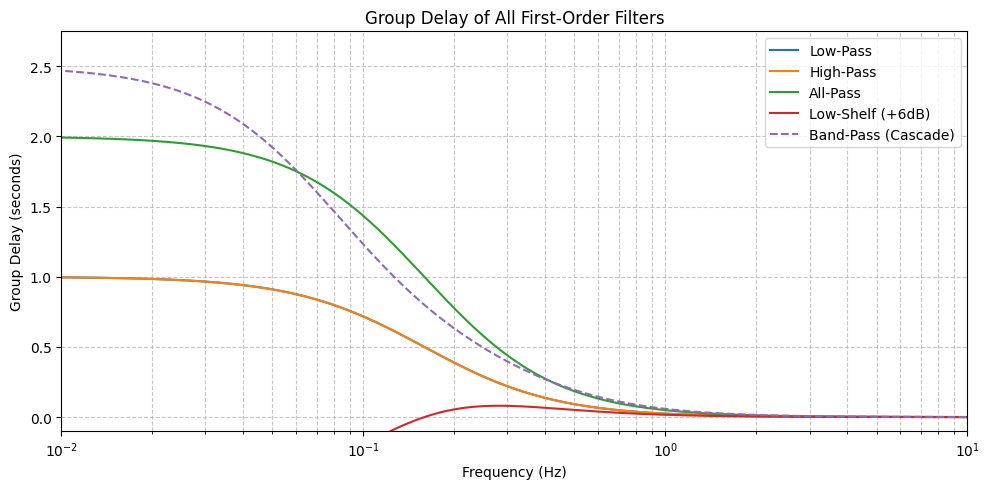

In [3]:
# Proper way to calculate group delay for analog filters
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

# Create figure
fig_fixed_gd, ax_fixed = plt.subplots(figsize=(10, 5))

# Group delay for all filters (proper calculation for analog filters)
for label, data in filters.items():
    # Get transfer function coefficients
    b, a = data["sys"].num, data["sys"].den
    
    # Calculate frequency response at specified frequencies
    w, h = signal.freqs(b, a, w)
    
    # Calculate phase response (unwrapped)
    phase = np.unwrap(np.angle(h))
    
    # Calculate group delay as negative derivative of phase w.r.t. frequency
    group_delay = -np.gradient(phase, w)
    
    # Plot group delay
    ax_fixed.semilogx(w / (2 * np.pi), group_delay, label=label, color=data["color"])

# Band-pass calculation (correctly combining LP and HP filters)
w_lp, h_lp = signal.freqs(lp_sys.num, lp_sys.den, w)
w_hp, h_hp = signal.freqs(hp_sys.num, hp_sys.den, w)

# Calculate phases
phase_lp = np.unwrap(np.angle(h_lp))
phase_hp = np.unwrap(np.angle(h_hp))

# Calculate individual group delays
gd_lp = -np.gradient(phase_lp, w)
gd_hp = -np.gradient(phase_hp, w)

# Combined group delay (sum of individual group delays for cascade)
gd_bp_comb = gd_lp + gd_hp

# Plot the combined band-pass group delay
ax_fixed.semilogx(w / (2 * np.pi), gd_bp_comb, '--', label="Band-Pass (Cascade)", color=colors['bp'])

# Decorate plot
ax_fixed.set_title("Group Delay of All First-Order Filters")
ax_fixed.set_xlabel("Frequency (Hz)")
ax_fixed.set_ylabel("Group Delay (seconds)")
ax_fixed.set_xlim(0.01, 10)
ax_fixed.set_ylim(-0.1, np.max(gd_bp_comb) * 1.1)  # Changed from *10 to *1.1 for better visualization
ax_fixed.legend()
ax_fixed.grid(True, which='both', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [4]:
import numpy as np
from scipy.io.wavfile import write

# Parameters
duration = 30.0  # seconds
sample_rate = 44100
t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)

# Generate synthetic audio with multiple layers
low_noise = 0.5 * np.sin(2 * np.pi * 100 * t)                     # Bass tone
mid_tone = 0.3 * np.sin(2 * np.pi * 1000 * t)                     # Mid tone
high_tone = 0.2 * np.sin(2 * np.pi * 4000 * t)                    # Treble
pulse = 0.6 * (np.sin(2 * np.pi * 3 * t) > 0).astype(float)       # Low-frequency pulses (square wave)
noise = 0.1 * np.random.normal(0, 1, len(t))                      # Broadband noise

# Mix all components
audio_complex = low_noise + mid_tone + high_tone + pulse + noise
audio_complex /= np.max(np.abs(audio_complex))  # Normalize

# Save as WAV for interactive use
write("complex_synthetic.wav", sample_rate, (audio_complex * 32767).astype(np.int16))
audio = audio_complex


In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import butter, lfilter, freqz
import ipywidgets as widgets
from IPython.display import display, Audio, clear_output

# Load the audio
sample_rate, audio = wavfile.read("complex_synthetic.wav")
audio = audio.astype(np.float32) / np.max(np.abs(audio))
duration = len(audio) / sample_rate
t = np.linspace(0, duration, len(audio))

# Apply 3-band EQ
def apply_eq(audio, sample_rate, gain_low=0, gain_mid=0, gain_high=0):
    nyq = 0.5 * sample_rate
    b_lp, a_lp = butter(2, 300 / nyq, btype='low')
    b_bp, a_bp = butter(2, [600 / nyq, 3000 / nyq], btype='band')
    b_hp, a_hp = butter(2, 4000 / nyq, btype='high')

    low = lfilter(b_lp, a_lp, audio) * (10 ** (gain_low / 20))
    mid = lfilter(b_bp, a_bp, audio) * (10 ** (gain_mid / 20))
    high = lfilter(b_hp, a_hp, audio) * (10 ** (gain_high / 20))

    output = low + mid + high
    return output / np.max(np.abs(output))

# Update function with Bode and FFT plots
def update_eq_with_bode(gain_low, gain_mid, gain_high):
    clear_output(wait=True)

    nyq = 0.5 * sample_rate
    b_lp, a_lp = butter(2, 300 / nyq, btype='low')
    b_bp, a_bp = butter(2, [600 / nyq, 3000 / nyq], btype='band')
    b_hp, a_hp = butter(2, 4000 / nyq, btype='high')

    # Get frequency responses
    w, h_lp = freqz(b_lp, a_lp, worN=1024, fs=sample_rate)
    _, h_bp = freqz(b_bp, a_bp, worN=1024, fs=sample_rate)
    _, h_hp = freqz(b_hp, a_hp, worN=1024, fs=sample_rate)

    # Apply gain
    h_lp *= 10 ** (gain_low / 20)
    h_bp *= 10 ** (gain_mid / 20)
    h_hp *= 10 ** (gain_high / 20)
    H_total = h_lp + h_bp + h_hp

    # Filter audio
    filtered = apply_eq(audio, sample_rate, gain_low, gain_mid, gain_high)

    # Compute FFT
    N = 4096
    fft_vals = np.fft.rfft(filtered[:N])
    fft_freqs = np.fft.rfftfreq(N, d=1/sample_rate)
    fft_magnitude = 20 * np.log10(np.abs(fft_vals) + 1e-8)

    # Plot everything
    plt.figure(figsize=(14, 10))

    # Time domain
    plt.subplot(3, 1, 1)
    plt.plot(t[:2000], filtered[:2000])
    plt.title(f"Filtered Output (Low {gain_low} dB, Mid {gain_mid} dB, High {gain_high} dB)")
    plt.ylabel("Amplitude")
    plt.grid(True)

    # Frequency response
    plt.subplot(3, 1, 2)
    plt.semilogx(w, 20 * np.log10(np.abs(h_lp) + 1e-8), label="Low")
    plt.semilogx(w, 20 * np.log10(np.abs(h_bp) + 1e-8), label="Mid")
    plt.semilogx(w, 20 * np.log10(np.abs(h_hp) + 1e-8), label="High")
    plt.semilogx(w, 20 * np.log10(np.abs(H_total) + 1e-8), label="Combined", color="black", linewidth=2)
    plt.title("Bode Magnitude Response (with Gains)")
    plt.ylabel("Gain (dB)")
    plt.ylim([-30, 30])
    plt.grid(True, which='both', linestyle='--')
    plt.legend()

    # FFT plot
    plt.subplot(3, 1, 3)
    plt.semilogx(fft_freqs, fft_magnitude)
    plt.title("FFT of Filtered Signal")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Magnitude (dB)")
    plt.grid(True, which='both', linestyle='--')

    plt.tight_layout()
    plt.show()

    # Audio playback
    display(Audio(filtered, rate=sample_rate))

# Sliders
widgets.interact(
    update_eq_with_bode,
    gain_low=widgets.FloatSlider(min=-20, max=20, step=1, value=0, description="Low (dB)"),
    gain_mid=widgets.FloatSlider(min=-20, max=20, step=1, value=0, description="Mid (dB)"),
    gain_high=widgets.FloatSlider(min=-20, max=20, step=1, value=0, description="High (dB)")
)

interactive(children=(FloatSlider(value=0.0, description='Low (dB)', max=20.0, min=-20.0, step=1.0), FloatSlid…

<function __main__.update_eq_with_bode(gain_low, gain_mid, gain_high)>